## Homework 2
Cecilia Doyle  
Dynamics and Control of Modern Power Systems

## Problem 1 Solution

We know:  
$\displaystyle \;\;  \ddot{\theta} = \dot{\omega} = \alpha $  
$\displaystyle \;\;  T = J\alpha $  
$\displaystyle \;\;  J = ml^2 $  
$\displaystyle \;\;  T_g = Fl $  

From figure 1:  
$\displaystyle \;\;  T = T_e - T_g $  
$\displaystyle \;\;  ml^2\alpha = T_e - mgsin\theta \; \; OR  \;\; \alpha = \frac{T_e}{ml^2} - \frac{mglsin\theta}{ml^2}$  

Thus the governing differential equations are:  
$\displaystyle \;\;  \dot{\theta} = \omega $  
$\displaystyle \;\;  \dot{\omega} = \frac{1}{l}(\frac{T_e}{ml} - gsin\theta) $ 

## Problem 2 Solution

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import sympy as sp

#### Part A

In [2]:
#define constants
Vinf = 1
Vt = 1
R = 0
X = 0.5
M = 1
Pm = 1.5
D = 0.5

#find equilibrium points
Pmax = (Vinf * Vt) / X
Sep = np.arcsin(Pm/Pmax)
Uep = np.pi - Sep
Sep,Uep

(0.848062078981481, 2.293530574608312)

In [3]:
#functions

#backwards euler (for boundary region of attraction)
def euler_step_b(t, w, h):
    fx = (1/M) * (Pm - (Pmax*np.sin(t))-(D*w))
    w_new = w - (fx*h)
    t_new = t - (w*h)

    return t_new, w_new

def draw_b(t0, w0, h, l):
    t = [t0]
    w = [w0]
    for i in range(l):
        ti, wi = euler_step_b(t[-1], w[-1], h)
        t.append(ti)
        w.append(wi)

    return t, w

#forward euler (for stable and unstable trajectories)
def euler_step_f(t, w, h):
    fx = (1/M) * (Pm - (Pmax*np.sin(t))-(D*w))
    w_new = w + (fx*h)
    t_new = t + (w*h)

    return t_new, w_new

def draw_f(t0, w0, h, l):
    t = [t0]
    w = [w0]
    for i in range(l):
        ti, wi = euler_step_f(t[-1], w[-1], h)
        t.append(ti)
        w.append(wi)

    return t, w

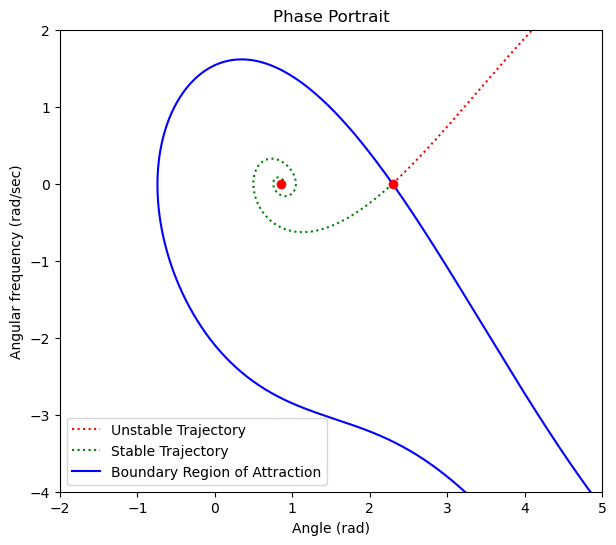

In [4]:
#for left side of unstable point
t0_left = Uep - 0.001
w0_left = 0.001
t_left, w_left = draw_b(t0_left, w0_left, 0.01, 875)

#for right side of unstable point
t0_right = Uep + 0.001
w0_right = - 0.001
t_right, w_right = draw_b(t0_right, w0_right, 0.01, 875)

#for unstable trajectory
t0_u = Uep + 0.001
w0_u = 0.001
t_u, w_u = draw_f(t0_u, w0_u, 0.01, 10000)

#for stable trajectory
t0_s = Uep - 0.001
w0_s = - 0.001
t_s, w_s = draw_f(t0_s, w0_s, 0.01, 10000)

#plot all results
plt.figure(figsize = (7,6))
plt.plot(t_u, w_u, ':r')
plt.plot(t_s, w_s, ':g')
plt.plot(t_left, w_left, '-b')
plt.plot(t_right, w_right, '-b')
plt.plot(Uep, 0, 'or')
plt.plot(Sep, 0, 'or')
plt.ylim(-4, 2)
plt.xlim(-2, 5)
plt.title('Phase Portrait')
plt.xlabel('Angle (rad)')
plt.ylabel('Angular frequency (rad/sec)')
plt.legend(['Unstable Trajectory', 'Stable Trajectory', 'Boundary Region of Attraction']);

#### Part B

The resulting graph is logical because we can see the angle for the stable trajectory converges while the angle for the unstable trajectory diverges.


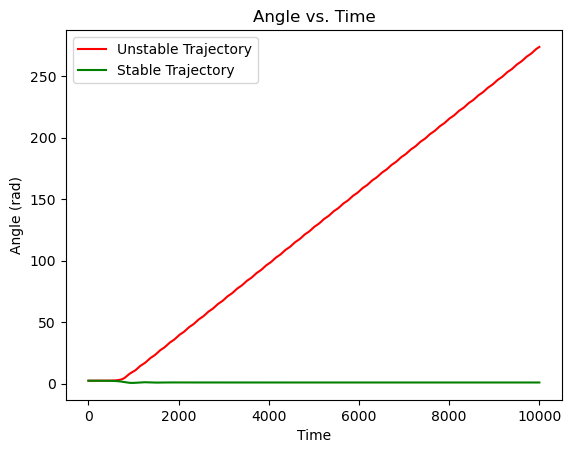

In [5]:
plt.plot(t_u[0:10000], 'r')
plt.plot(t_s[0:10000], 'g')
plt.title('Angle vs. Time')
plt.xlabel('Time')
plt.ylabel('Angle (rad)')
plt.legend(['Unstable Trajectory','Stable Trajectory']);
print('The resulting graph is logical because we can see the angle for the stable trajectory converges while the angle for the unstable trajectory diverges.')

## Problem 3 Solution

In [6]:
#define constants
Vinf = 1
Vt = 1
R = 0.1
X = 0.4
M = 1
D = 0.5
Pm = 2

#calculate G and B from R and X
G = R / (R**2 + X**2)
B = -X / (R**2 + X**2)

#admittance matrix
Y = [[(G+ (B*1j)), -(G+ (B*1j))], [-(G+ (B*1j)), (G+ (B*1j))]]

#### Part A

In [7]:
#find equilibrium points
x = sp.symbols('x')
Pe = (Vt*Vinf*((G*sp.cos(x)) + (B*sp.sin(x)))) + (Vt*Vt*G) - Pm
Sep, Uep = sp.solve(Pe, x)

#partials of Pelec
dPdt_u = Vt*Vinf * (-G*sp.sin(Uep) + B*sp.cos(Uep))
dPdt_s = Vt*Vinf * (-G*sp.sin(Sep) + B*sp.cos(Sep))

#jacobians at stable and unstable equilibrium
Ju = [[0 , 1], [(-1/M)*dPdt_u , -D/M]]
Js = [[0 , 1], [(-1/M)*dPdt_s , -D/M]]
# Ju = [[0 , 1], [dPdt_u , D]]
# Js = [[0 , 1], [dPdt_s , D]]

#eigenvalues
eval_u, evec_u = np.linalg.eig(np.array(Ju, dtype=complex))
eval_s, evec_s = np.linalg.eig(np.array(Js, dtype=complex))

print(f"The unstable and stable equilibrium points are θu = {Uep} and θs = {Sep} respectively.")
print(f"The eigenvalues corresponding to the unstable equilibrium point are {eval_u[0]} and {eval_u[1]}")
print(f"The eigenvalues corresponding to the stable equilibrium point are {eval_s[0]} and {eval_s[1]}")

The unstable and stable equilibrium points are θu = -0.376312468407562 and θs = -2.27532285892850 respectively.
The eigenvalues corresponding to the unstable equilibrium point are (1.176402493079549+0j) and (-1.6764024930795491+0j)
The eigenvalues corresponding to the stable equilibrium point are (-0.25+1.3818914835339111j) and (-0.2500000000000001-1.3818914835339111j)


#### Part B

In [8]:
#functions

#backwards euler (for boundary region of attraction)
def euler_step_b2(t, w, h):
    fx = (1/M) * (Pm - ((Vt*Vinf*((G*sp.cos(t)) + (B*sp.sin(t)))) + (Vt*Vt*G))-(D*w))
    w_new = w - (fx*h)
    t_new = t - (w*h)

    return t_new, w_new

def draw_b2(t0, w0, h, l):
    t = [t0]
    w = [w0]
    for i in range(l):
        ti, wi = euler_step_b2(t[-1], w[-1], h)
        t.append(ti)
        w.append(wi)

    return t, w

#forward euler (for stable and unstable trajectories)
def euler_step_f2(t, w, h):
    fx = (1/M) * (Pm - ((Vt*Vinf*((G*sp.cos(t)) + (B*sp.sin(t)))) + (Vt*Vt*G))-(D*w))
    w_new = w + (fx*h)
    t_new = t + (w*h)

    return t_new, w_new

def draw_f2(t0, w0, h, l):
    t = [t0]
    w = [w0]
    for i in range(l):
        ti, wi = euler_step_f2(t[-1], w[-1], h)
        t.append(ti)
        w.append(wi)

    return t, w

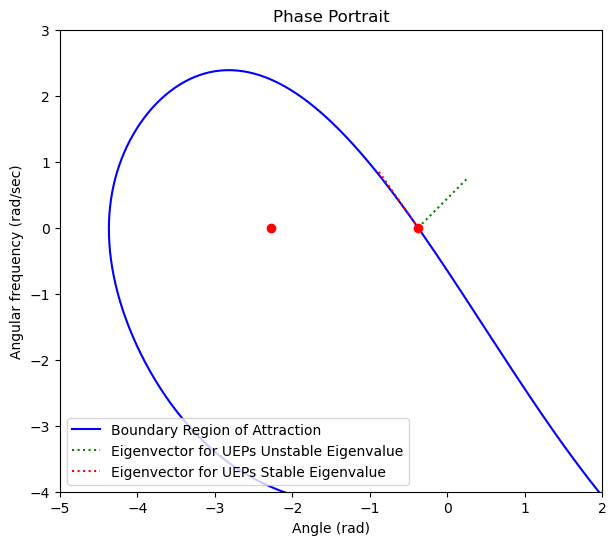

In [9]:
#for left side of unstable point
t0_left = Uep - 0.001
w0_left = 0.001
t_left, w_left = draw_b2(t0_left, w0_left, 0.01, 800)

#for right side of unstable point
t0_right = Uep + 0.001
w0_right = - 0.001
t_right, w_right = draw_b2(t0_right, w0_right, 0.01, 500)

#for Uep: eval_u[1] = stable, eval[0] = unstable
#eigenvector for stable eigenvalue of Uep
evec_u_s = evec_u[:, 1]
#eigenvector for unstable eigenvalue of Uep
evec_u_u = evec_u[:,0]

#plot
plt.figure(figsize = (7,6))
plt.plot(t_left, w_left, '-b')
plt.plot((0+Uep, evec_u_u.real[0]+Uep), (0, evec_u_u.real[1]), ':g')
plt.plot((0+Uep, evec_u_s.real[0]+Uep), (0, evec_u_s.real[1]), ':r')
plt.plot(t_right, w_right, '-b')
plt.plot(Uep, 0, 'or')
plt.plot(Sep, 0, 'or')
plt.ylim(-4, 3)
plt.xlim(-5, 2)
plt.title('Phase Portrait')
plt.xlabel('Angle (rad)')
plt.ylabel('Angular frequency (rad/sec)')
plt.legend(['Boundary Region of Attraction', 'Eigenvector for UEPs Unstable Eigenvalue', 'Eigenvector for UEPs Stable Eigenvalue'], loc = 'lower left');


#### Part C

In [10]:
#new set of points
thetas = np.arange(Sep, Uep + 0.1, 0.01)
evals = []

# linearize and get eigenvalues
for i in range(len(thetas)):
    t = thetas[i]
    dPdt = Vt*Vinf * (-G*sp.sin(t) + B*sp.cos(t)) #partial
    J = [[0 , 1], [(-1/M)*dPdt , -D/M]] #jacobian
    eval = np.linalg.eigvals(np.array(J, dtype=complex))
    evals.append([eval])


The real part of the eigenvalues are constant at -0.25 until θ = -1.326 radians, which is where Pelec(θmax) occurs.
Then they split and one becomes positive while the other becomes negative.
The plot below shows that this behavior of the eigenvectors results in a pitchfork bifurcation.


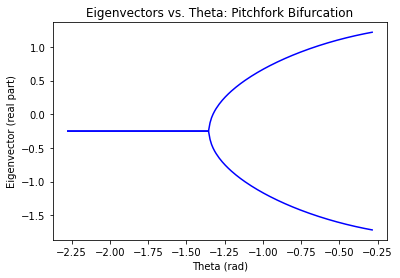

In [11]:
evals_formatted = np.concatenate(evals, axis=0)
plt.plot(thetas, evals_formatted.real[:,0], '-b')
plt.plot(thetas, evals_formatted.real[:,1], '-b')
plt.title('Eigenvectors vs. Theta: Pitchfork Bifurcation')
plt.xlabel('Theta (rad)')
plt.ylabel('Eigenvector (real part)');
print('The real part of the eigenvalues are constant at -0.25 until θ = -1.326 radians, which is where Pelec(θmax) occurs.')
print('Then they split and one becomes positive while the other becomes negative.')
print('The plot below shows that this behavior of the eigenvectors results in a pitchfork bifurcation.')

#### Part D

In [12]:
Pe_vals = []

for i in range(len(thetas)):
    t = thetas[i]
    Pe_i = (Vt*Vinf*((G*sp.cos(t)) + (B*sp.sin(t)))) + (Vt*Vt*G)
    Pe_vals.append(Pe_i)

Pe_max = max(Pe_vals)
T_max = thetas[np.argmax(Pe_vals)]

print(f'The maximum value of Pelec(θ) along the path in part (c) is {Pe_max} at θ = {T_max}.')

The maximum value of Pelec(θ) along the path in part (c) is 3.01359124757890 at θ = -1.32532285892852.


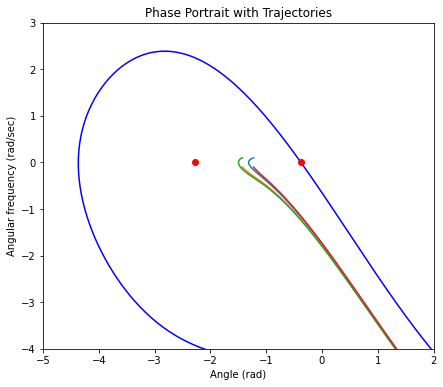

In [13]:
#new Pm
Pm = 3.1

#create 4 trajectories around given initial conditions
t1, w1 = draw_b2(T_max + 0.1, 0.1, 0.01, 800)
t2, w2 = draw_b2(T_max - 0.1, - 0.1, 0.01, 800)
t3, w3 = draw_b2(T_max - 0.1, 0.1, 0.01, 800)
t4, w4 = draw_b2(T_max + 0.1, - 0.1, 0.01, 800)

plt.figure(figsize = (7,6))
plt.plot(t1, w1)
plt.plot(t2, w2)
plt.plot(t3, w3)
plt.plot(t4, w4)
plt.plot(t_left, w_left, '-b')
plt.plot(t_right, w_right, '-b')
plt.plot(Uep, 0, 'or')
plt.plot(Sep, 0, 'or')
plt.ylim(-4, 3)
plt.xlim(-5, 2)
plt.title('Phase Portrait with Trajectories')
plt.xlabel('Angle (rad)')
plt.ylabel('Angular frequency (rad/sec)');
